Found 2961 files belonging to 3 classes.
Found 420 files belonging to 3 classes.
Found 103 files belonging to 3 classes.
Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 65s 486ms/step - accuracy: 0.3742 - loss: 1.1808 - val_accuracy: 0.4357 - val_loss: 1.0200
Epoch 2/30


c:\Users\dell\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30


c:\Users\dell\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
c:\Users\dell\anaconda3\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 436ms/step - accuracy: 0.5487 - loss: 0.9352 - val_accuracy: 0.5333 - val_loss: 0.9157
Epoch 4/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 43s 456ms/step - accuracy: 0.6376 - loss: 0.8003 - val_accuracy: 0.6595 - val_loss: 0.8084
Epoch 6/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 43s 457ms/step - accuracy: 0.6695 - loss: 0.7497 - val_accuracy: 0.7357 - val_loss: 0.7208
Epoch 8/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 446ms/step - accuracy: 0.7457 - loss: 0.6496 - val_accuracy: 0.7738 - val_loss: 0.6454
Epoch 10/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 444ms/step - accuracy: 0.7873 - loss: 0.5806 - val_accuracy: 0.7905 - val_loss: 0.5

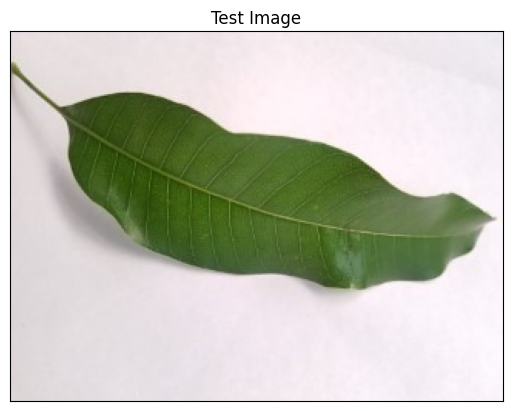

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted Index: 1


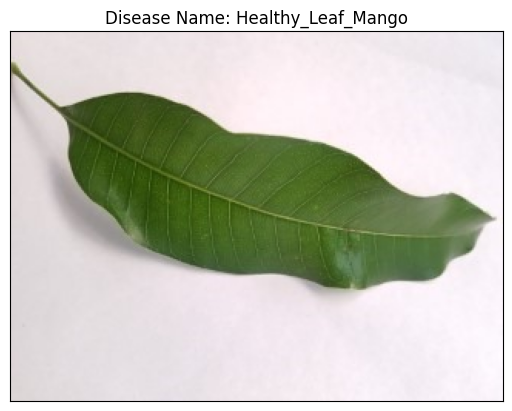

103/103 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
                                       precision    recall  f1-score   support

Anthracnose_Fungal_Leaf_Disease_Mango       0.70      0.94      0.81        33
                   Healthy_Leaf_Mango       0.86      0.89      0.87        35
              Rust_Leaf_Disease_Mango       1.00      0.66      0.79        35

                             accuracy                           0.83       103
                            macro avg       0.86      0.83      0.82       103
                         weighted avg       0.86      0.83      0.82       103



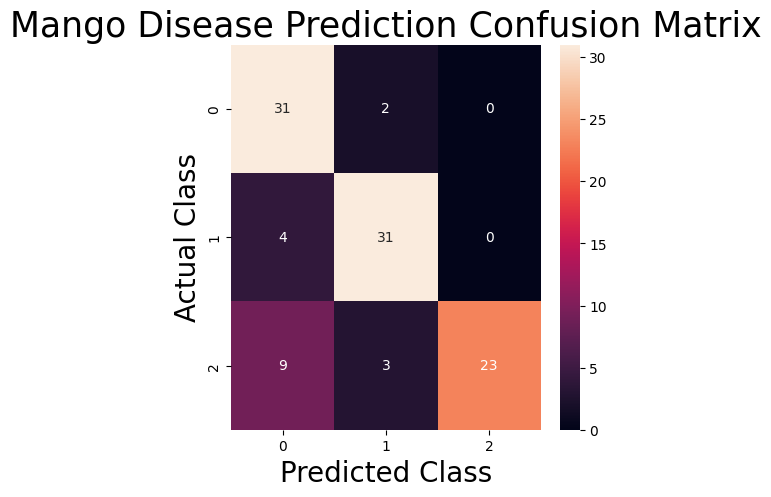

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json
import cv2

# Load the datasets
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2)
])

# Apply augmentation to the training set
training_set = training_set.map(lambda x, y: (data_augmentation(x, training=True), y))

# Use a pretrained model (EfficientNet)
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model

# CNN Model using Transfer Learning
cnn = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Train the model
training_history = cnn.fit(
    training_set,
    validation_data=validation_set,
    epochs=30,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set),
    callbacks=[early_stopping, checkpoint]
)

# Save model and training history
cnn.save('trained_plant_disease_model.keras')
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

# Evaluate the model on training and validation sets
train_loss, train_acc = cnn.evaluate(training_set)
val_loss, val_acc = cnn.evaluate(validation_set)
print(f'Training accuracy: {train_acc}')
print(f'Validation accuracy: {val_acc}')


# Test on a specific image
image_path = 'C:/Users/dell/Desktop/ML/test/Healthy_Leaf_Mango/image7.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Preprocess and predict
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to batch format
predictions = cnn.predict(input_arr)
result_index = np.argmax(predictions)
print("Predicted Index:", result_index)

# Display prediction
class_names = validation_set.class_names
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

# Confusion matrix and classification report
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, annot_kws={"size": 10})
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Mango Disease Prediction Confusion Matrix', fontsize=25)
plt.show()

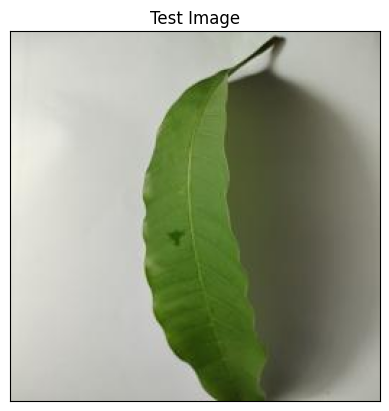

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted Index: 1


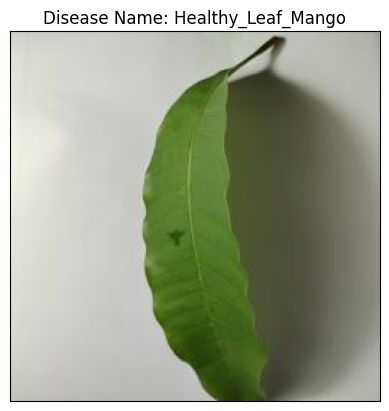

In [9]:
# Test on a specific image
image_path = 'C:/Users/dell/Desktop/ML/test/Healthy_Leaf_Mango/image26.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Preprocess and predict
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to batch format
predictions = cnn.predict(input_arr)
result_index = np.argmax(predictions)
print("Predicted Index:", result_index)

# Display prediction
class_names = validation_set.class_names
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

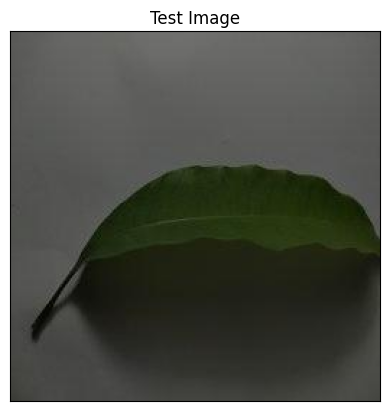

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted Index: 1


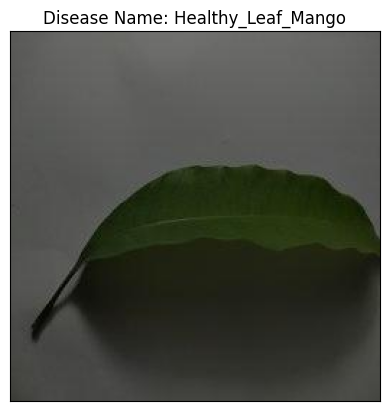

In [10]:
# Test on a specific image
image_path = 'C:/Users/dell/Desktop/ML/test/Healthy_Leaf_Mango/image1.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Preprocess and predict
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to batch format
predictions = cnn.predict(input_arr)
result_index = np.argmax(predictions)
print("Predicted Index:", result_index)

# Display prediction
class_names = validation_set.class_names
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

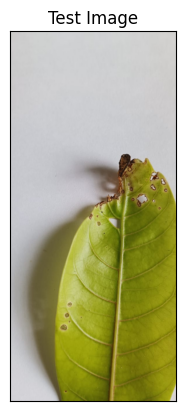

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Predicted Index: 0


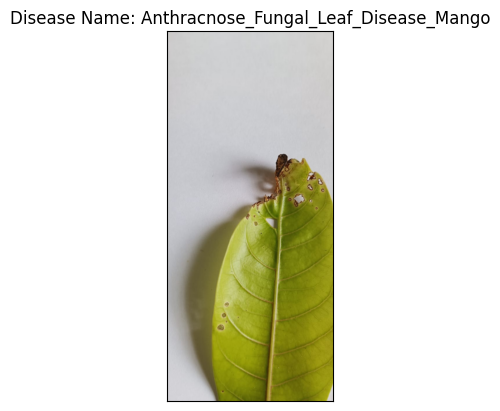

In [7]:
# Test on a specific image
image_path = 'C:/Users/dell/Desktop/ML/test/Anthracnose_Fungal_Leaf_Disease_Mango/749f1fdf-9dcd-4ddd-a6eb-b78ff798af8a.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Preprocess and predict
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to batch format
predictions = cnn.predict(input_arr)
result_index = np.argmax(predictions)
print("Predicted Index:", result_index)

# Display prediction
class_names = validation_set.class_names
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

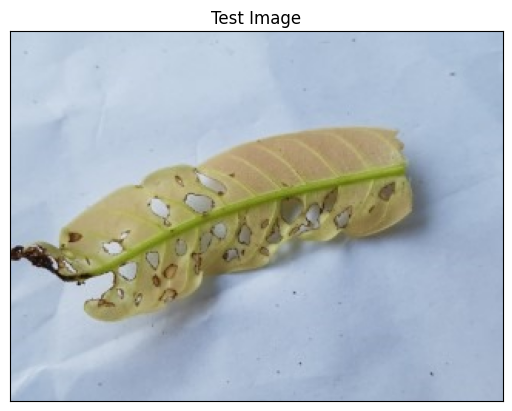

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Predicted Index: 0


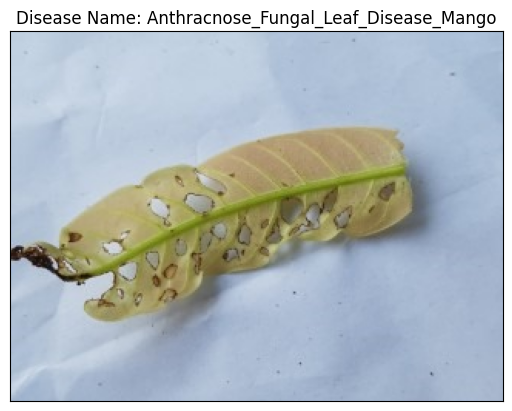

In [8]:
# Test on a specific image
image_path = 'C:/Users/dell/Desktop/ML/test/Anthracnose_Fungal_Leaf_Disease_Mango/a5b5bced-f5b6-48f5-897d-d489d83bf7a9.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Preprocess and predict
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to batch format
predictions = cnn.predict(input_arr)
result_index = np.argmax(predictions)
print("Predicted Index:", result_index)

# Display prediction
class_names = validation_set.class_names
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

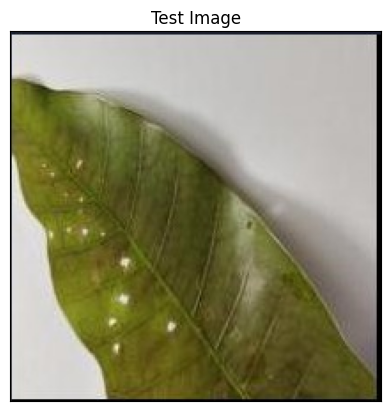

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Index: 2


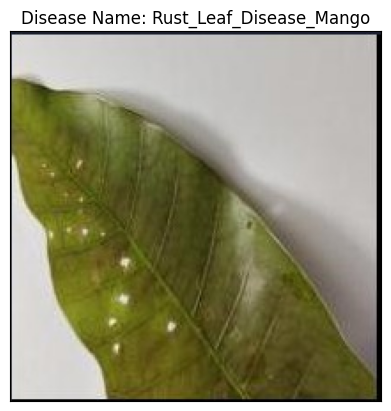

In [15]:
# Test on a specific image
image_path = 'C:/Users/dell/Desktop/ML/test/Rust_Leaf_Disease_Mango/image8.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Preprocess and predict
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to batch format
predictions = cnn.predict(input_arr)
result_index = np.argmax(predictions)
print("Predicted Index:", result_index)

# Display prediction
class_names = validation_set.class_names
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

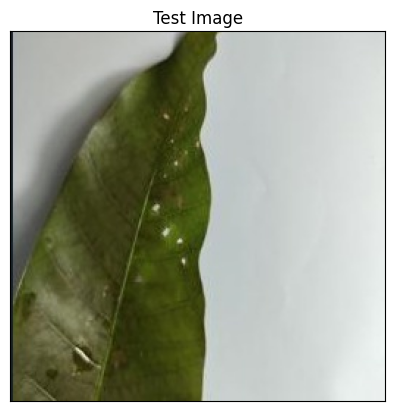

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Predicted Index: 2


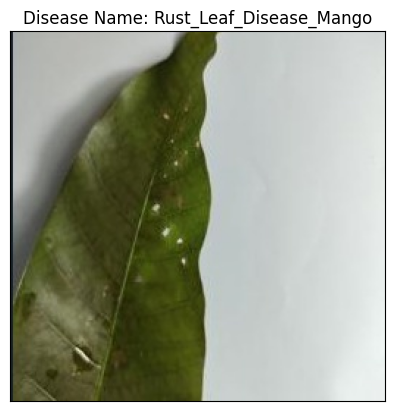

In [14]:
# Test on a specific image
image_path = 'C:/Users/dell/Desktop/ML/test/Rust_Leaf_Disease_Mango/image4.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Preprocess and predict
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to batch format
predictions = cnn.predict(input_arr)
result_index = np.argmax(predictions)
print("Predicted Index:", result_index)

# Display prediction
class_names = validation_set.class_names
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

Found 2961 files belonging to 3 classes.
Found 420 files belonging to 3 classes.
Found 105 files belonging to 3 classes.
93/93 ━━━━━━━━━━━━━━━━━━━━ 45s 409ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step
Validation Set Performance:
                                       precision    recall  f1-score   support

Anthracnose_Fungal_Leaf_Disease_Mango       0.98      1.00      0.99       140
                   Healthy_Leaf_Mango       1.00      0.99      0.99       140
              Rust_Leaf_Disease_Mango       1.00      0.99      1.00       140

                             accuracy                           0.99       420
                            macro avg       0.99      0.99      0.99       420
                         weighted avg       0.99      0.99      0.99       420

Test Set Performance:
                                       precision    recall  f1-score   support

Anthracnose_Fungal_Leaf_Disease_Mango       0.95      1.00      0.97

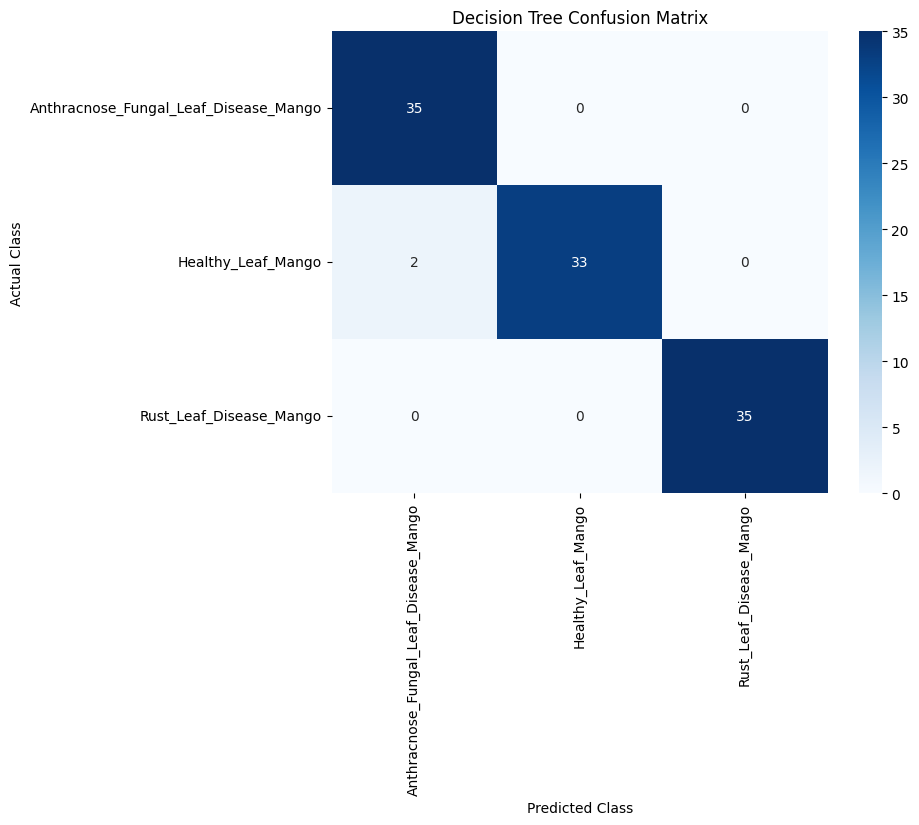

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


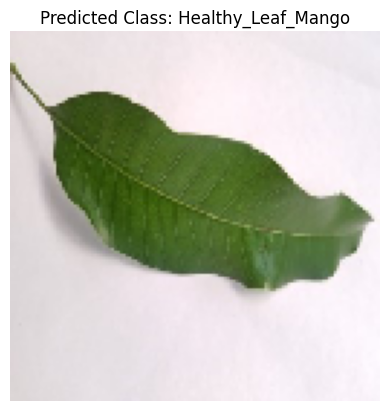

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the datasets
image_size = (128, 128)
batch_size = 32

def extract_features_and_labels(dataset):
    features = []
    labels = []
    for images, lbls in dataset:
        features.append(images.numpy())
        labels.append(lbls.numpy())
    return np.vstack(features), np.vstack(labels)

train_ds = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=1,
    image_size=image_size,
    shuffle=False
)

class_names = train_ds.class_names

# Load EfficientNetB0 as a feature extractor
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'  # Global Average Pooling for feature extraction
)

# Extract features from datasets
train_features, train_labels = extract_features_and_labels(train_ds)
val_features, val_labels = extract_features_and_labels(val_ds)
test_features, test_labels = extract_features_and_labels(test_ds)

# Pass features through the EfficientNet model
train_features = base_model.predict(train_features, batch_size=batch_size)
val_features = base_model.predict(val_features, batch_size=batch_size)
test_features = base_model.predict(test_features, batch_size=1)

# Convert one-hot labels to single integers
train_labels = np.argmax(train_labels, axis=1)
val_labels = np.argmax(val_labels, axis=1)
test_labels = np.argmax(test_labels, axis=1)

# Train Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
decision_tree.fit(train_features, train_labels)

# Evaluate the decision tree
val_predictions = decision_tree.predict(val_features)
test_predictions = decision_tree.predict(test_features)

print("Validation Set Performance:")
print(classification_report(val_labels, val_predictions, target_names=class_names))

print("Test Set Performance:")
print(classification_report(test_labels, test_predictions, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Predict a single image
image_path = 'C:/Users/dell/Desktop/ML/test/Healthy_Leaf_Mango/image7.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.expand_dims(input_arr, axis=0)
input_arr = tf.keras.applications.efficientnet.preprocess_input(input_arr)

# Extract features and predict
image_features = base_model.predict(input_arr)
single_prediction = decision_tree.predict(image_features)
predicted_class = class_names[single_prediction[0]]

# Display the image and prediction
plt.imshow(tf.keras.preprocessing.image.array_to_img(input_arr[0]))
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()


Found 2961 files belonging to 3 classes.
Found 420 files belonging to 3 classes.
Found 105 files belonging to 3 classes.
Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 67s 489ms/step - accuracy: 0.2695 - loss: 1.5185 - val_accuracy: 0.4476 - val_loss: 1.0513
Epoch 2/30


c:\Users\dell\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30


c:\Users\dell\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
c:\Users\dell\anaconda3\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 439ms/step - accuracy: 0.4856 - loss: 1.0403 - val_accuracy: 0.6167 - val_loss: 0.9582
Epoch 4/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 40s 430ms/step - accuracy: 0.6223 - loss: 0.8708 - val_accuracy: 0.6500 - val_loss: 0.8623
Epoch 6/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 47s 502ms/step - accuracy: 0.6832 - loss: 0.7550 - val_accuracy: 0.6690 - val_loss: 0.7745
Epoch 8/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 44s 473ms/step - accuracy: 0.7296 - loss: 0.6798 - val_accuracy: 0.6857 - val_loss: 0.7003
Epoch 10/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 77s 824ms/step - accuracy: 0.7478 - loss: 0.6414 - val_accuracy: 0.7595 - val_loss: 0.6

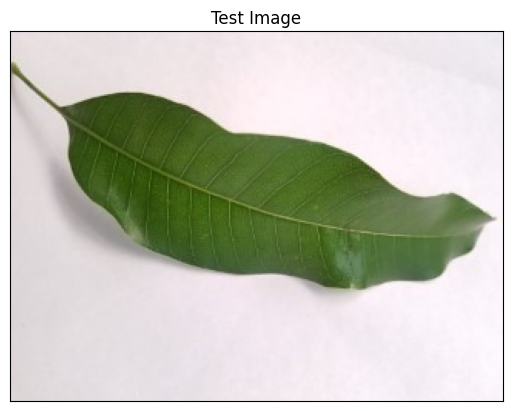

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Index: 1


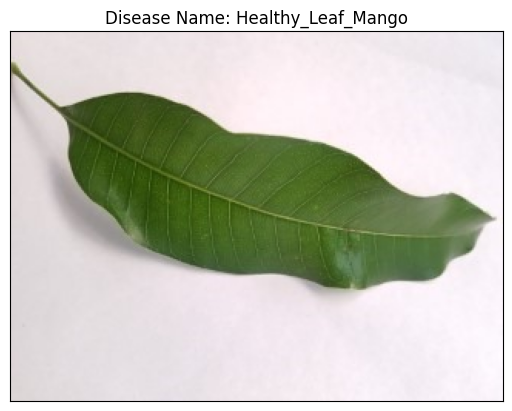

105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step
                                       precision    recall  f1-score   support

Anthracnose_Fungal_Leaf_Disease_Mango       0.74      0.91      0.82        35
                   Healthy_Leaf_Mango       0.86      0.91      0.89        35
              Rust_Leaf_Disease_Mango       1.00      0.71      0.83        35

                             accuracy                           0.85       105
                            macro avg       0.87      0.85      0.85       105
                         weighted avg       0.87      0.85      0.85       105



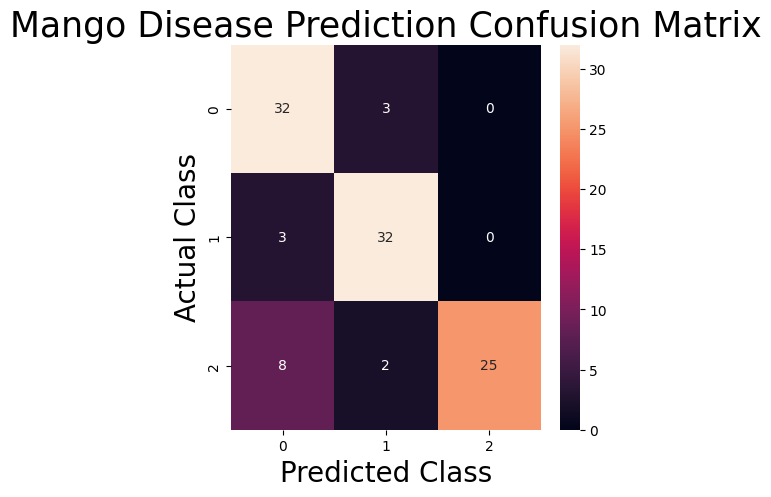

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json
import cv2

# Load the datasets
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2)
])

# Apply augmentation to the training set
training_set = training_set.map(lambda x, y: (data_augmentation(x, training=True), y))

# Use a pretrained model (EfficientNet)
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model

# CNN Model using Transfer Learning
cnn = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Train the model
training_history = cnn.fit(
    training_set,
    validation_data=validation_set,
    epochs=30,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set),
    callbacks=[early_stopping, checkpoint]
)

# Save model and training history
cnn.save('trained_plant_disease_model.keras')
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

# Evaluate the model on training and validation sets
train_loss, train_acc = cnn.evaluate(training_set)
val_loss, val_acc = cnn.evaluate(validation_set)
print(f'Training accuracy: {train_acc}')
print(f'Validation accuracy: {val_acc}')


# Test on a specific image
image_path = 'C:/Users/dell/Desktop/ML/test/Healthy_Leaf_Mango/image7.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Preprocess and predict
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to batch format
predictions = cnn.predict(input_arr)
result_index = np.argmax(predictions)
print("Predicted Index:", result_index)

# Display prediction
class_names = validation_set.class_names
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

# Confusion matrix and classification report
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, annot_kws={"size": 10})
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Mango Disease Prediction Confusion Matrix', fontsize=25)
plt.show()

Found 2961 files belonging to 3 classes.
Found 420 files belonging to 3 classes.
Found 105 files belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

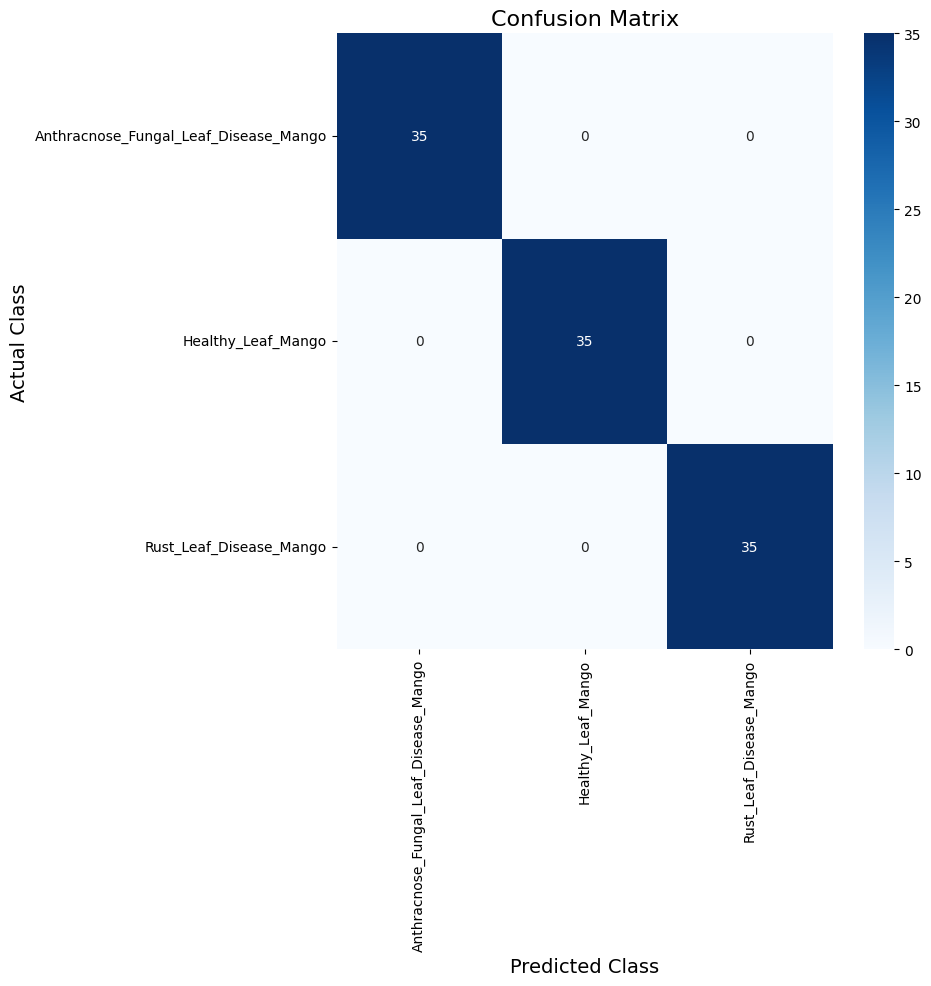

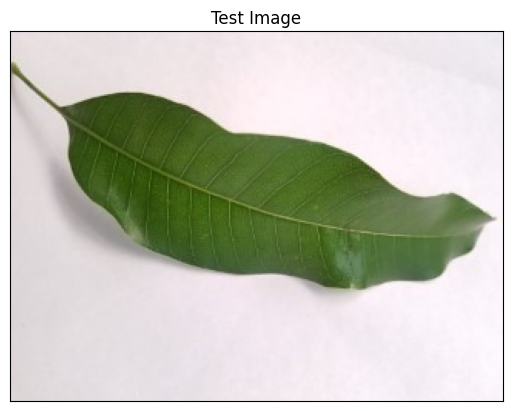

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted label: Healthy_Leaf_Mango


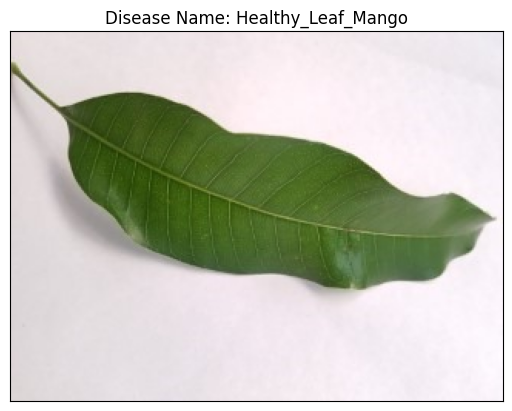

In [5]:
import tensorflow as tf
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import cv2

# Load datasets
raw_training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=42
)

raw_validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=42
)

raw_test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Extract class names
class_names = raw_training_set.class_names

# Normalize pixel values
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)
training_set = raw_training_set.map(lambda x, y: (normalization_layer(x), y))
validation_set = raw_validation_set.map(lambda x, y: (normalization_layer(x), y))
test_set = raw_test_set.map(lambda x, y: (normalization_layer(x), y))

# Extract features using EfficientNetB0
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
base_model.trainable = False  # Freeze base model

def extract_features(dataset):
    features = []
    labels = []
    for images, lbls in dataset:
        features.append(base_model.predict(images))
        labels.append(lbls.numpy())
    return np.vstack(features), np.vstack(labels)

# Extract features and labels for training, validation, and test sets
X_train, y_train = extract_features(training_set)
X_valid, y_valid = extract_features(validation_set)
X_test, y_test = extract_features(test_set)

# Convert one-hot encoded labels to class indices
y_train = np.argmax(y_train, axis=1)
y_valid = np.argmax(y_valid, axis=1)
y_test = np.argmax(y_test, axis=1)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Save the model
joblib.dump(rf, 'random_forest_model.joblib')

# Evaluate on training set with cross-validation to avoid overfitting
cross_val_scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy (Training Set): {np.mean(cross_val_scores):.2f}")

# Evaluate on validation and test sets
valid_acc = rf.score(X_valid, y_valid)
test_acc = rf.score(X_test, y_test)
print(f'Validation Accuracy: {valid_acc:.2f}')
print(f'Test Accuracy: {test_acc:.2f}')

# Predict on test set
y_pred = rf.predict(X_test)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Actual Class', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Test on a specific image
image_path = 'C:/Users/dell/Desktop/ML/test/Healthy_Leaf_Mango/image7.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = normalization_layer(input_arr)
input_arr = np.expand_dims(input_arr, axis=0)

# Extract features from the image
input_features = base_model.predict(input_arr)

# Predict with Random Forest
prediction = rf.predict(input_features)
predicted_label = class_names[prediction[0]]
print(f'Predicted label: {predicted_label}')

# Display prediction
plt.imshow(img)
plt.title(f"Disease Name: {predicted_label}")
plt.xticks([])
plt.yticks([])
plt.show()


Found 2961 files belonging to 3 classes.
Found 420 files belonging to 3 classes.
Found 105 files belonging to 3 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step
Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 44s 395ms/step - accuracy: 0.3323 - loss: 1.8386 - val_accuracy: 0.2833 - val_loss: 1.3853
Epoch 2/30


c:\Users\dell\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
c:\Users\dell\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
c:\Users\dell\anaconda3\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 44s 467ms/step - accuracy: 0.4561 - loss: 1.3762 - val_accuracy: 0.2833 - val_loss: 1.3053
Epoch 4/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 39s 420ms/step - accuracy: 0.4531 - loss: 1.3652 - val_accuracy: 0.3000 - val_loss: 1.2296
Epoch 6/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 34s 364ms/step - accuracy: 0.4734 - loss: 1.2728 - val_accuracy: 0.3119 - val_loss: 1.2060
Epoch 8/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 32s 342ms/step - accuracy: 0.4671 - loss: 1.2922 - val_accuracy: 0.3238 - val_loss: 1.1662
Epoch 10/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/30
93/93 ━━━━━━━━━━━━━━

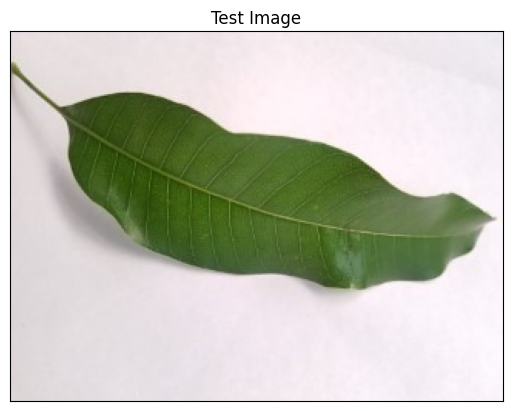

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Index: 0


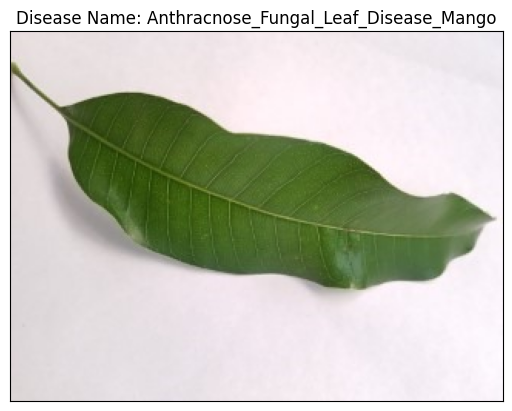

105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step
                                       precision    recall  f1-score   support

Anthracnose_Fungal_Leaf_Disease_Mango       0.45      0.91      0.60        35
                   Healthy_Leaf_Mango       0.55      0.31      0.40        35
              Rust_Leaf_Disease_Mango       0.93      0.37      0.53        35

                             accuracy                           0.53       105
                            macro avg       0.64      0.53      0.51       105
                         weighted avg       0.64      0.53      0.51       105



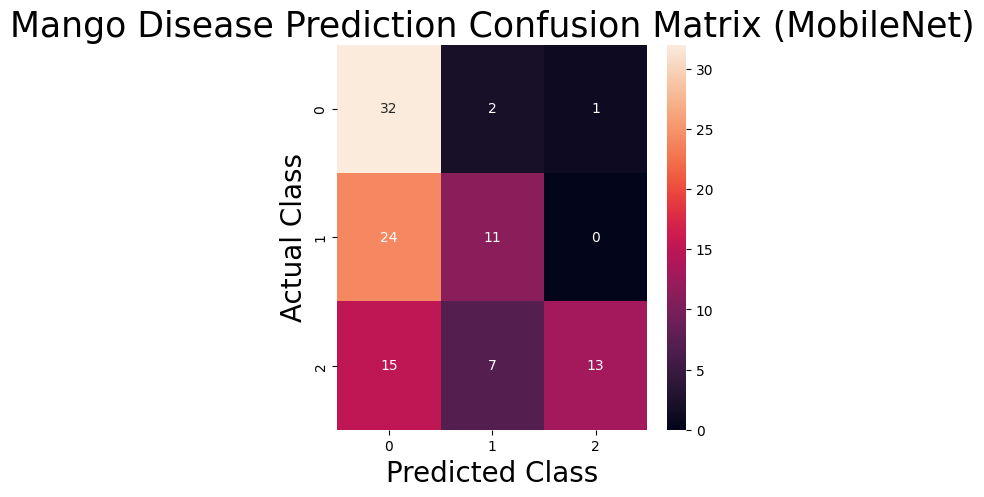

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json
import cv2

# Load the datasets
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2)
])

# Apply augmentation to the training set
training_set = training_set.map(lambda x, y: (data_augmentation(x, training=True), y))

# Use a pretrained model (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model

# CNN Model using Transfer Learning
cnn = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Train the model
training_history = cnn.fit(
    training_set,
    validation_data=validation_set,
    epochs=30,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set),
    callbacks=[early_stopping, checkpoint]
)

# Save model and training history
cnn.save('trained_plant_disease_model_mobilenet.keras')
with open('training_hist_mobilenet.json', 'w') as f:
    json.dump(training_history.history, f)

# Evaluate the model on training and validation sets
train_loss, train_acc = cnn.evaluate(training_set)
val_loss, val_acc = cnn.evaluate(validation_set)
print(f'Training accuracy: {train_acc}')
print(f'Validation accuracy: {val_acc}')

# Test on a specific image
image_path = 'C:/Users/dell/Desktop/ML/test/Healthy_Leaf_Mango/image7.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Preprocess and predict
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to batch format
predictions = cnn.predict(input_arr)
result_index = np.argmax(predictions)
print("Predicted Index:", result_index)

# Display prediction
class_names = validation_set.class_names
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

# Confusion matrix and classification report
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, annot_kws={"size": 10})
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Mango Disease Prediction Confusion Matrix (MobileNet)', fontsize=25)
plt.show()
